In [3]:
class A:
    x = 123
    def __init__(self):
        self.y = 5
        pass
    def __hash__(self):
        return 1

In [4]:
A()

In [5]:
lst = [A(),A()]
print(lst)

[<__main__.A object at 0x0000000005E98748>, <__main__.A object at 0x0000000005E98A58>]


In [8]:
a = set(lst)
print(len(a))
for x in a:
    print(hash(x))

2
1
1


In [26]:
class A:
    x = 123
    def __init__(self):
        self.y = 5
        pass
    def __hash__(self):
        return 1
    def __eq__(self,other):
        return True


In [27]:
lst = [A(),A()]
print(lst)
a = set(lst)
print(len(a))

[<__main__.A object at 0x00000000072BF898>, <__main__.A object at 0x00000000072BF278>]
1


In [20]:
for x in a:
    print(hash(x))
print(a)

1
{<__main__.A object at 0x00000000072BF438>}


In [30]:
class A:
    x = 123
    def __init__(self,a):
        self.y = a
        pass
    def __hash__(self):
        return 1
    def __eq__(self,other):
        return self.y == other.y

In [33]:
a = A(4)
b = A(4)
ls = [a,b]
g = set(ls)

In [35]:
a.__eq__(b)

True

In [36]:
from collections import Hashable

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  """Entry point for launching an IPython kernel.


In [37]:
class Point:
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def __hash__(self):
        return hash((self.x,self.y))
    def __eq__(self,other):
        return self.x == other.x and self.y == other.y

In [38]:
p1=Point(4,5)
p2=Point(4,5)
print(hash(p1))
print(hash(p2))

3713084879518070856
3713084879518070856


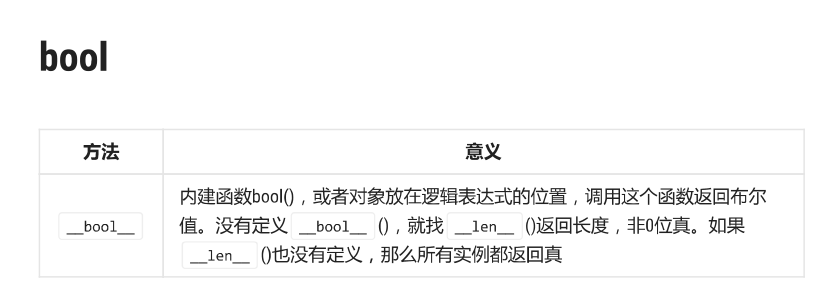

In [39]:
print(bool(p1))

True


In [40]:
class Point:
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def __hash__(self):
        return hash((self.x,self.y))
    def __eq__(self,other):
        return self.x == other.x and self.y == other.y
    def __len__(self):
        return 0

In [41]:
print(bool(Point(4,5)))

False


In [44]:
class Point:
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def __hash__(self):
        return hash((self.x,self.y))
    def __eq__(self,other):
        return self.x == other.x and self.y == other.y
    def __len__(self):
        return 0
    def __bool__(self):
        return True

In [45]:
print(bool(Point(4,5)))

True


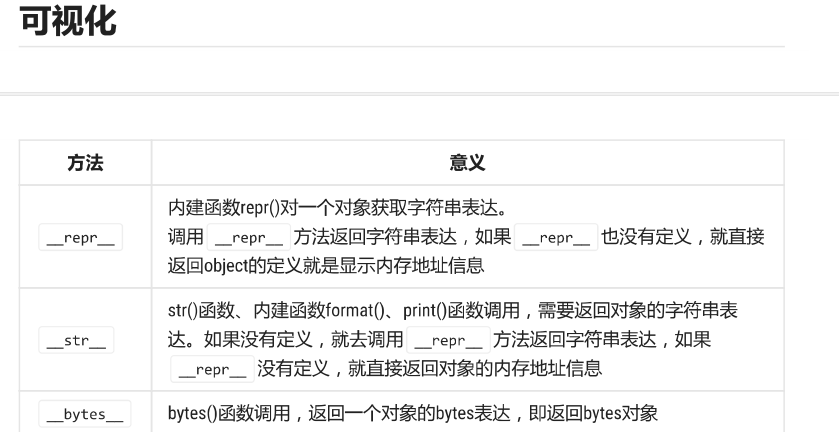

In [59]:
class Point:
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def __hash__(self):
        return hash((self.x,self.y))
    def __eq__(self,other):
        return self.x == other.x and self.y == other.y
    def __repr__(self):
        return str(123) #return str('abc')
    def __str__(self):
        return str('abc')
    def __bytes__(self):
        return "{} is {}".format(self.x,self.y).encode()

In [60]:
p1=Point(4,5)
p2=Point(5,6)
print(p1)

abc


In [57]:
lst=[p1,p2]

In [49]:
print(lst)#直接作用于对象，返回abc，

[123, 123]


In [52]:
print(list(map(str,lst)))

['abc', 'abc']


In [53]:
print(str(p1))

abc


In [54]:
Point.__bases__

(object,)

In [61]:
print(bytes(p1))

b'4 is 5'


##  运算符重载

In [69]:
class A:
    def __init__(self,x):
        self.x = x
    def __sub__(self,other): #运算符重载
        return  A(self.x - other.x)
    def __ne__(self,other):
        return self.x != other.x

In [70]:
a1 = A(4)
a2 = A(5)

In [71]:
a1 - a2

In [72]:
a3 = A(10)
lst=[a1,a2,a3]

In [73]:
sorted(lst)

TypeError: '<' not supported between instances of 'A' and 'A'

In [76]:
class A:
    def __init__(self,x):
        self.x = x
    def __sub__(self,other): #运算符重载
        return  A(self.x - other.x)
    def __ne__(self,other):
        return self.x != other.x
    def __lt__(self,other):
        return self.x < other.x
    def __repr__(self):
        return str(self.x)

In [78]:
a1 = A(4)
a2 = A(5)
a3 = A(10)
lst=[a1,a2,a3]

In [79]:
sorted(lst)

[4, 5, 10]

In [80]:
a1 += a2

TypeError: unsupported operand type(s) for +=: 'A' and 'A'

In [83]:
class A:
    def __init__(self,x):
        self.x = x
    def __sub__(self,other): #运算符重载
        return  A(self.x - other.x)
    def __ne__(self,other):
        return self.x != other.x
    def __lt__(self,other):
        return self.x < other.x
    def __repr__(self):
        return str(self.x)
    def __iadd__(self,other):
        return A(self.x + other.x)

In [86]:
a1 = A(4)
a2 = A(5)
a1 += a2
a1

9

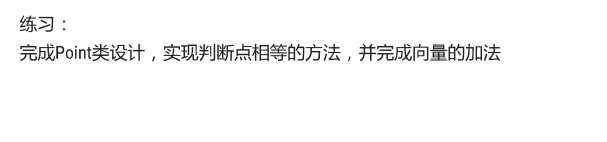

In [89]:
class Point:
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def __eq__(self,other):
        return self.x == self.x and self.y == self.y
    def __add__(self,other):
        return Point(self.x + other.x,self.y + other.y)
    def __repr__(self):
        return str((self.x,self.y))
    

In [90]:
a = Point(4,5)
b = Point(5,6)
print(a + b)

(9, 11)


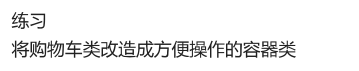

In [96]:
class Item:
    def __init(self,name,**kwargs):
        self.name = name
        self._spec=kwargs
    def __repr__(self):
        return "{} = {}".format(self.name,self._spec)
class Cart:
    def __init__(self):
        self.items=[]
    def __len__(self):
        return len(self.items)
    def additem(self,item):
        self.items.append(item)
    def __add__(self,other):
        print(other)
        #if isinstance(other,Item):为了测试所以没有加
        self.items.append(other)
        return self
    def __getitem__(self,index):#index
        return self.items[index]
    #def __missing__(self,key):
        #return 
    def __setitem__(self,key,value):
        print(key,value)
        #self[key] = value 为什么错
        self.items[key] = value 
    def __iter__(self):
        return iter(self.items)
    def __repr__(self):
        return str(self.items)
             

In [92]:
cart=Cart()
for x in cart:
    print(x)

AttributeError: 'Cart' object has no attribute 'item'

In [98]:
cart=Cart()
print(len(cart))
print(cart + 2 + 3 + 4 + 5)#等价于cart.__add__(2).__add__(3)
for x in cart:
    print(x)

0
2
3
4
5
[2, 3, 4, 5]
2
3
4
5


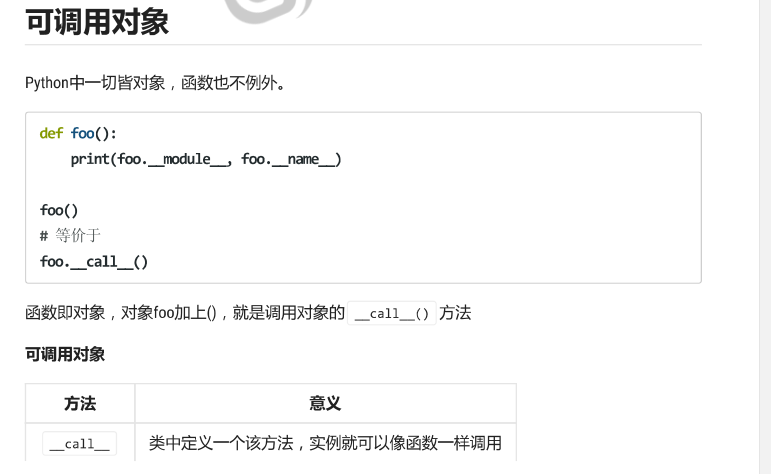

In [103]:
class Fib:
    def __init__(self):
        self.lst = [0,1,1]
    def __len__(self):
        return len(self.lst)
    def __call__(self,x):
        if x < len(self.lst):
            return self.lst
        for i in range(2,x):
            self.lst.append(self.lst[i-1] + self.lst[i])
        return self.lst
    def __getitem(self,index):
        if index < 0:
            return None
        if index < len(self):
            return self.lst[index]
        
        self[index]

In [104]:
a=Fib()
print(a(6))

[0, 1, 1, 2, 3, 5, 8]


In [105]:
print(a(4))

[0, 1, 1, 2, 3, 5, 8]


In [106]:
print(a(10))

[0, 1, 1, 2, 3, 5, 8, 2, 3, 5, 8, 13, 10, 5, 8]


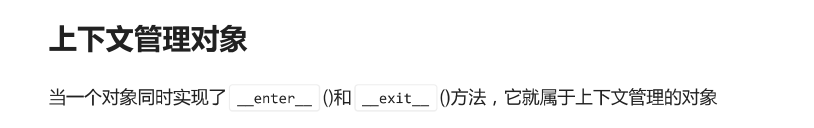

In [107]:
class Fib:
    def __init__(self):
        self.lst = [0,1,1]
    def __len__(self):
        return len(self.lst)
    def __call__(self,x):
        if x < len(self.lst):
            return self.lst
        for i in range(2,x):
            self.lst.append(self.lst[i-1] + self.lst[i])
        return self.lst
    def __getitem(self,index):
        if index < 0:
            return None
        if index < len(self):
            return self.lst[index]
        
        self[index]

In [128]:
class Fib:
    def __init__(self):
        self.lst = [0,1,1]
    def __len__(self):
        return len(self.lst)
    def __call__(self,x):
        if x < len(self.lst):
            return self.lst
        for i in range(2,x):
            self.lst.append(self.lst[i-1] + self.lst[i])
        return self.lst
    def __getitem__(self,index):
        if index < 0:
            return None
        if index < len(self):
            return self.lst[index]
        
        self[index]
        
    def __enter__(self):#进来做啥事情
        print(self.__class__)
    def __exit__(self, exec_type, exc_val, exc_tb):
        print(self.__class__.__name__)

In [129]:
with Fib() as f:
    pass

<class '__main__.Fib'>
Fib


In [130]:
p=Fib()
with p as f:
    print(f==p)
    print(f is p)
    print(p)
    print(f)

<class '__main__.Fib'>
False
False
None
Fib


In [136]:
class Fib:
    def __init__(self):
        self.lst = [0,1,1]
    def __len__(self):
        return len(self.lst)
    def __call__(self,x):
        if x < len(self.lst):
            return self.lst
        for i in range(2,x):
            self.lst.append(self.lst[i-1] + self.lst[i])
        return self.lst
    def __getitem__(self,index):
        if index < 0:
            return None
        if index < len(self):
            return self.lst[index]
        
        self[index]
        
    def __enter__(self):#进来做啥事情
        print(self.__class__)
        return self
    def __exit__(self, exec_type, exc_val, exc_tb):
        print(self.__class__.__name__)
        print(exec_type)
        print(exc_val)
        print(exc_tb)
        return 1

In [138]:
p=Fib()
with p as f:
    raise Exception('error123')
    print(f==p)
    print(f is p)
    print(p)
    print(f)
print("*"*20)

<class '__main__.Fib'>
Fib
<class 'Exception'>
error123
********************


In [142]:
class Fib:
    def __init__(self):
        self.lst = [0,1,1]
    def __len__(self):
        return len(self.lst)
    def __call__(self,x):
        if x < len(self.lst):
            return self.lst
        for i in range(2,x):
            self.lst.append(self.lst[i-1] + self.lst[i])
        return self.lst
    def __getitem__(self,index):
        if index < 0:
            return None
        if index < len(self):
            return self.lst[index]
        
        self[index]
        
    def __enter__(self):#进来做啥事情
        print(self.__class__)
        return self
    def __exit__(self, exec_type, exc_val, exc_tb):
        print(self.__class__.__name__)
        print(exec_type)
        print(exc_val)
        print(exc_tb)
        return 0

In [144]:
p = Fib()
with p as f:
    raise Exception('error123')
    print(f == p)
    print(f is p)
    print(p)
    print(f)
print ("*"*20)

<class '__main__.Fib'>
Fib
<class 'Exception'>
error123


Exception: error123

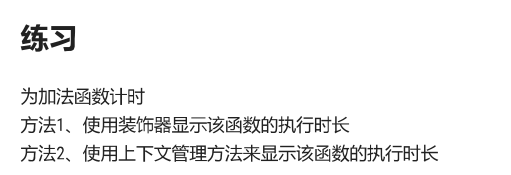

In [177]:
import time
import datetime
import functools
class TimeIt:
    def __init__(self,fn):
        self._fn = fn
    def __enter__(self):
        print('enter')
        self.start = datetime.datetime.now()
        return self._fn
    def __exit__(self, exec_type, exc_val, exc_tb):
        print('exit')
        delta = (datetime.datetime.now() - self.start).total_seconds()
        print("contest {} took {}s".format(self._fn.__name__,delta))
        pass
def logger(fn):
    @functools.wraps(fn)
    def warpper(*args, **kargs):
        start = datetime.datetime.now()
        ret = fn(*args, **kargs)
        delta = (datetime.datetime.now() - start).total_seconds()
        print("{} took {}s".format(fn.__name__,delta))
        return ret
    return warpper
def add(x,y):
    time.sleep(2)
    return x + y

In [179]:
with TimeIt(add) as f:
    print(add(5,6))

enter
11
exit
contest add took 2.003115s


In [180]:
with TimeIt(add) as f:
    print(f(5,6))

enter
11
exit
contest add took 2.003115s


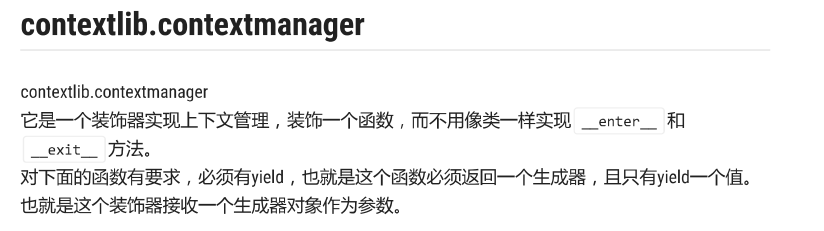

In [3]:
import contextlib

@contextlib.contextmanager
def foo():
    print('enter')
    yield 3,5 #return的话后面就永远执行不到
    print('exit')
with foo() as f:
    print(f)

enter
(3, 5)
exit


In [4]:
import contextlib

@contextlib.contextmanager
def foo():
    print('enter')
    yield 3,5 #return的话后面就永远执行不到
    print('exit')
with foo() as f:
    raise Exception
    print(f)

enter


Exception: 

In [5]:
import contextlib

@contextlib.contextmanager
def foo():
    print('enter')
    try:
        
        yield 3,5 #return的话后面就永远执行不到
    finally:    
        print('exit')
with foo() as f:
    raise Exception
    print(f)

enter
exit


Exception: 

In [6]:
import contextlib,datetime,time

@contextlib.contextmanager
def add(x,y):
    start = datetime.datetime.now()
    try:
        yield x + y
    finally:
        delta = (datetime.datetime.now()-start).total_seconds()
        print(delta)

with add(4,5) as f:
    time.sleep(2)
    print(f)

9
2.001114


In [7]:
from functools import total_ordering

@total_ordering #如果没有这个会出现什么结果
class A:
    def __init__(self,x):
        self.x = x
    #def __ge__(self,other):
        #return self.x >= other.x
    def __lt__(self,other):#大于或等于多选一
        return self.x < other.x
    def __eq__(self,other):#必须要
        return self.x == other.x

In [8]:
print(A(5) >= A(6))

False


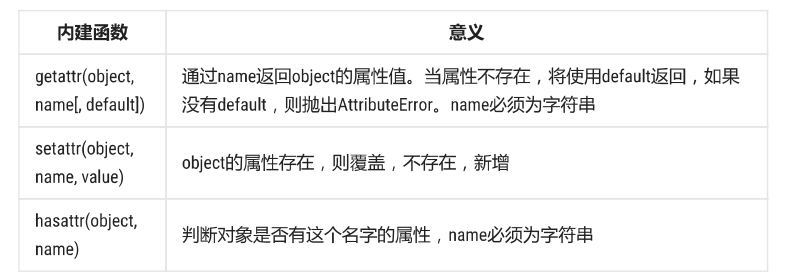

In [14]:
class A():
    def __init__(self):
        self.x = 5

In [15]:
a = A()
setattr(A,'y',10)
print(A.__dict__)
print(a.__dict__)

{'__module__': '__main__', '__init__': <function A.__init__ at 0x0000000005FA2378>, '__dict__': <attribute '__dict__' of 'A' objects>, '__weakref__': <attribute '__weakref__' of 'A' objects>, '__doc__': None, 'y': 10}
{'x': 5}


In [16]:
print(getattr(a,'x'))
print(getattr(a,'y'))

5
10


In [17]:
setattr(a, 'y', 1000)

In [18]:
print(getattr(a,'x'))
print(getattr(a,'y'))

5
1000


In [19]:
setattr(a, 'mtd', lambda self: 1)

In [20]:
print(A.__dict__)
print(a.__dict__)

{'__module__': '__main__', '__init__': <function A.__init__ at 0x0000000005FA2378>, '__dict__': <attribute '__dict__' of 'A' objects>, '__weakref__': <attribute '__weakref__' of 'A' objects>, '__doc__': None, 'y': 10}
{'x': 5, 'y': 1000, 'mtd': <function <lambda> at 0x00000000073856A8>}


In [21]:
class Point:
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def __str__(self):
        return "Point({},{})".format(self.x, self.y)
    def show(self):
        print(self)

In [22]:
p1 = Point(4,5)
p2 = Point(10,10)
print(repr(p1), repr(p2), sep='\n')

In [23]:
if not hasattr(p1, 'sub'):
    setattr(p1, 'sub', lambda self, other: Point(self.x - other.x, self.y - other.y))

In [24]:
print(A.__dict__)
print(a.__dict__)

{'__module__': '__main__', '__init__': <function A.__init__ at 0x0000000005FA2378>, '__dict__': <attribute '__dict__' of 'A' objects>, '__weakref__': <attribute '__weakref__' of 'A' objects>, '__doc__': None, 'y': 10}
{'x': 5, 'y': 1000, 'mtd': <function <lambda> at 0x00000000073856A8>}


In [25]:
type(p1)

__main__.Point

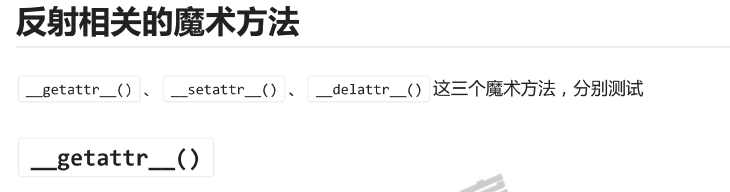

In [138]:
class Base:
    n = 5
class A:
    m = 6
    def __init__(self, x):
        self.x = x
    def __getattr__(self, item):
        print('__getattr__', item)
    def __setattr__(self, key, values):
        print('setattr=', key, values)
    def __delattr__(self, item):
        print('delattr')

In [146]:
a = A(12)
a.x
print(a.__dict__)

setattr= x 12
__getattr__ x
{}


In [139]:
print(A(10).y)
print(A(10).__dict__)

setattr= x 10
__getattr__ y
None
setattr= x 10
{}


In [140]:
a = A(12)
a.x

setattr= x 12
__getattr__ x


In [46]:
a = A(10)
a.x = 100

setattr= x 10
setattr= x 100


In [47]:
a.y = 100

setattr= y 100


In [48]:
print(a.__dict__)

{}


In [49]:
a.y

__getattr__ y


In [50]:
del a.x

delattr


In [51]:
print(a.__dict__)

{}


In [65]:

print(A.__dict__)

{'__module__': '__main__', '__init__': <function A.__init__ at 0x0000000007C1A620>, '__getattr__': <function A.__getattr__ at 0x0000000007C1A1E0>, '__setattr__': <function A.__setattr__ at 0x0000000007C1A8C8>, '__delattr__': <function A.__delattr__ at 0x0000000007C1A048>, '__dict__': <attribute '__dict__' of 'A' objects>, '__weakref__': <attribute '__weakref__' of 'A' objects>, '__doc__': None}


In [141]:
class Base:
    n = 0

class Point(Base):
    z = 6
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def show(self):
        print(self.x, self,y)
    
    def __getattr(self, item):
        return "missing {}".format(item)

In [144]:
p1=Point(4,5)
print(p1.x)
print(p1.__dict__)

4
{'x': 4, 'y': 5}


In [52]:
class Obj:
    def __init__(self, x):
        self.x = x
    def __delattr__(self, item):
        print('delattr')

In [53]:
a = Obj(5)

In [54]:
a.z = 10

In [55]:
a.__dict__

{'x': 5, 'z': 10}

In [57]:
del a.x

delattr


In [58]:
a.__dict__

{'x': 5, 'z': 10}

In [67]:
class Base:
    n = 5
class A:
    m = 6
    def __init__(self, x):
        self.x = x
    def __getattribute__(self, item):
        print('__getattribute__=', item)
    def __getattr__(self, item):
        print('__getattr__', item)
    def __setattr__(self, key, values):
        print('setattr=', key, values)
    def __delattr__(self, item):
        print('delattr')

In [68]:
a = A(10)

setattr= x 10


In [69]:
print(a.x)

__getattribute__= x
None


In [70]:
print(A.__dict__)

{'__module__': '__main__', 'm': 6, '__init__': <function A.__init__ at 0x0000000007C1A510>, '__getattribute__': <function A.__getattribute__ at 0x0000000007C1AD90>, '__getattr__': <function A.__getattr__ at 0x0000000007C1A950>, '__setattr__': <function A.__setattr__ at 0x0000000007C1ABF8>, '__delattr__': <function A.__delattr__ at 0x0000000007C1A9D8>, '__dict__': <attribute '__dict__' of 'A' objects>, '__weakref__': <attribute '__weakref__' of 'A' objects>, '__doc__': None}


In [73]:
class Base:
    n = 5
class A:
    m = 6
    def __init__(self, x):
        self.x = x
    def __getattr__(self, item):
        print('__getattr__', item)
    def __setattr__(self, key, values):
        print('setattr=', key, values)
    def __delattr__(self, item):
        print('delattr')

In [74]:
a = A(4)

setattr= x 4


In [75]:
print(a.__dict__)

{}


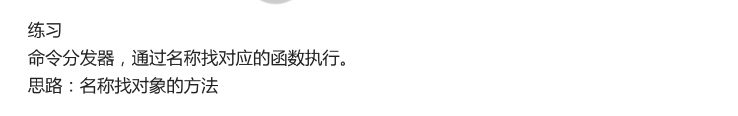

In [80]:
class Dispatcher():
    def cmd1(self):
        print('cmd1')
    
    def reg(self, cmd, fn):
        if isinstance(cmd, str):
            setattr(type(self), cmd, fn)
        else:
            print('error')
    
    def run(self):
        while True:
            cmd = input("plz input command: ")
            if cmd.strip() == 'quit':
                return
            getattr(self, cmd.strip(), self.defalutfn)()
            
    def defalutfn(self):
        print('defalut')

In [81]:
dis = Dispatcher()

dis.reg('cmd2', lambda self: print(2))
dis.reg('cmd3', lambda self: print(3))

dis.run()

plz input command: cmd1
cmd1
plz input command: cmd2
2
plz input command: q
defalut
plz input command: quit


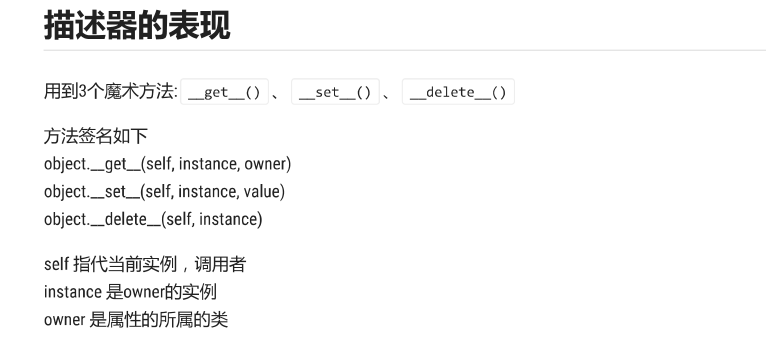

In [85]:
class A:
    def __init__(self):
        print('A init')
        self.a1 = 'a1'
class B:
    x = A()
    
    def __init__(self):
        print('B.init')
        self.x = 100
        pass    

A init


In [86]:
b = B()

B.init


In [87]:
print(B.x.a1)
print(b.x.a1)

a1


AttributeError: 'int' object has no attribute 'a1'

In [96]:
class A:
    def __init__(self):
        print('A init')
        self.a1 = 'a1'
    
    def __get__(self, instance, owner):
        print(self, "*",instance,"*", owner)
class B:
    x = A()
    
    def __init__(self):
        print('B.init')
        #self.x = 100
        pass    

A init


In [97]:
print(B.x.a1)

<__main__.A object at 0x0000000007826630> * None * <class '__main__.B'>


AttributeError: 'NoneType' object has no attribute 'a1'

In [98]:
print(B.x)

<__main__.A object at 0x0000000007826630> * None * <class '__main__.B'>
None


In [99]:
b = B()
print(B.x)
print(b.x)

B.init
<__main__.A object at 0x0000000007826630> * None * <class '__main__.B'>
None
<__main__.A object at 0x0000000007826630> * <__main__.B object at 0x0000000007826898> * <class '__main__.B'>
None


In [102]:
class A:
    def __init__(self):
        print('A init')
        self.a1 = 'a1'
    
    def __get__(self, instance, owner):
        print("***", self, "*",instance,"*", owner)
class B:
    x = A()
    
    def __init__(self):
        print('B.init')
        #self.x = 100
        self.x = A()

A init


In [103]:
b = B()
print(B.x)
print(b.x)

B.init
A init
*** <__main__.A object at 0x0000000006EEB438> * None * <class '__main__.B'>
None


In [104]:
class A:
    def __init__(self):
        print('A init')
        self.a1 = 'a1'
    
    def __get__(self, instance, owner):
        print("***", self, "*",instance,"*", owner)
        return self
class B:
    x = A()
    
    def __init__(self):
        print('B.init')
        #self.x = 100
        self.x = A()

A init


In [105]:
b = B()
print(B.x)
print(b.x)

B.init
A init
*** <__main__.A object at 0x0000000008FD6C50> * None * <class '__main__.B'>


In [4]:
class A:
    def __init__(self):
        print('A init')
        self.a1 = 'a1'
    
    def __get__(self, instance, owner):
        print("***get", self, "|",instance,"|", owner)
        return self
    
    def __set__(self, instance, value):
         print("***set", self, "|",instance,'|',value)
        
class B:
    x = A()
    
    def __init__(self):
        print('B.init')
        self.x = 100
        #self.x = A()

A init


In [5]:
print(B.x)
print(B.x.a1)
print()

***get <__main__.A object at 0x0000000005E88DD8> | None | <class '__main__.B'>
***get <__main__.A object at 0x0000000005E88DD8> | None | <class '__main__.B'>
a1



In [6]:
b = B()
print(B.x)


B.init
***set <__main__.A object at 0x0000000005E88DD8> | <__main__.B object at 0x0000000005E88668> | 100
***get <__main__.A object at 0x0000000005E88DD8> | None | <class '__main__.B'>


In [7]:
print(b.x.a1)

***get <__main__.A object at 0x0000000005E88DD8> | <__main__.B object at 0x0000000005E88668> | <class '__main__.B'>
a1


In [8]:
print(b.__dict__)
print(B.__dict__)

{}
{'__module__': '__main__', 'x': <__main__.A object at 0x0000000005E88DD8>, '__init__': <function B.__init__ at 0x0000000005E6FAE8>, '__dict__': <attribute '__dict__' of 'B' objects>, '__weakref__': <attribute '__weakref__' of 'B' objects>, '__doc__': None}


In [20]:
class A:
    def __init__(self):
        print('A init')
        self.a1 = 'a1'
    
    def __get__(self, instance, owner):
        print("***get", self, "|",instance,"|", owner)
        return self
    
    def __set__(self, instance, value):
         print("***set", self, "|",instance,'|',value)
        
class B:
    x = A()
    
    def __init__(self):
        print('B.init')
        self.x = A()

A init


In [21]:
b = B()



B.init
A init
***set <__main__.A object at 0x0000000006446908> | <__main__.B object at 0x0000000006688E10> | <__main__.A object at 0x0000000006688668>


In [23]:
b.x = 500
print(b.x)

***set <__main__.A object at 0x0000000006446908> | <__main__.B object at 0x0000000006688E10> | 500
***get <__main__.A object at 0x0000000006446908> | <__main__.B object at 0x0000000006688E10> | <class '__main__.B'>


In [25]:
print(B.__dict__)
print(b.__dict__)

{'__module__': '__main__', 'x': <__main__.A object at 0x0000000006446908>, '__init__': <function B.__init__ at 0x0000000006121950>, '__dict__': <attribute '__dict__' of 'B' objects>, '__weakref__': <attribute '__weakref__' of 'B' objects>, '__doc__': None}
{}


In [134]:
B.y = 100
b.h = 200
b.x = 300

***set <__main__.A object at 0x00000000077E5D68> | <__main__.B object at 0x0000000005E9E208> | 300


In [135]:
print(b.__dict__)
print(B.__dict__)

{'h': 200}
{'__module__': '__main__', 'x': <__main__.A object at 0x00000000077E5D68>, '__init__': <function B.__init__ at 0x00000000079B0598>, '__dict__': <attribute '__dict__' of 'B' objects>, '__weakref__': <attribute '__weakref__' of 'B' objects>, '__doc__': None, 'y': 100}


In [137]:
print(b.x)

***get <__main__.A object at 0x00000000077E5D68> | <__main__.B object at 0x0000000005E9E208> | <class '__main__.B'>


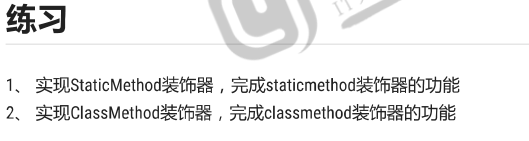

In [ ]:
from functools import partial
class Staticmethod:
    def __init__(self,fn):
        print(fn)
        self.fn = fn
    
    def __get__(self, instance, owner):
        print(self, instance, owner)
        return self.fn

class ClassMethod:
    def __init__(self,fn):
        print(fn)
        self.fn = fn
    
    def __get__(self, instance, owner):
        print(self, instance, owner)
        # return self.fn(owner)
        return partial(self.fn, cls)
class A:
    
    @Staticmethod
    def foo():
        print('static')
    @ClassMethod
    def bar(cls):
        print(cls.__name__)

### 参数检查

In [165]:
class Typed:
    def __init__(self, type):
        self.type = type

    def __get__(self, instance, owner):
        pass

    def __set__(self, instance, value):
        print('T.set', self, instance, value)
        if not isinstance(value, self.type):
            raise ValueError(value)
import inspect
def TypeAssert(cls):
    params = inspect.signature(Person).parameters
    print(params, params.items(), sep='\n')
    for name, param in params.items():
        print(name, param.annotation)
        if param.annotation != param.empty:
            setattr(cls, name, Typed(param.annotation))#nmae = Type(str)
    return cls

@TypeAssert
class Person:
    #name = Typed(str)
    #age = Type(int)

    def __init__(self, name:str, age:int):
        self.name = name
        self.age = age


OrderedDict([('name', <Parameter "name: str">), ('age', <Parameter "age: int">)])
odict_items([('name', <Parameter "name: str">), ('age', <Parameter "age: int">)])
name <class 'str'>
age <class 'int'>


In [166]:
p = Person('tom',18)

T.set <__main__.Typed object at 0x000000000751F5C0> <__main__.Person object at 0x00000000075F0518> tom
T.set <__main__.Typed object at 0x000000000751F4E0> <__main__.Person object at 0x00000000075F0518> 18


In [167]:
p.__dict__

{}

In [ ]:
class Typed:
    def __init__(self, type):
        self.type = type

    def __get__(self, instance, owner):
        pass

    def __set__(self, instance, value):
        print('T.set', self, instance, value)
        if not isinstance(value, self.type):
            raise ValueError(value)
import inspect
class TypeAssert:
    def __init__(self, cls):
        self.cls = cls

    def __call__(self, name, age):
        params = inspect.signature(Person).parameters
        print(params, params.items(), sep='\n')
        for name, param in params.items():
            print(name, param.annotation)
            if param.annotation != param.empty:
                setattr(self.cls, name, Typed(param.annotation))#nmae = Type(str)

@TypeAssert
class Person:
    #name = Typed(str)
    #age = Type(int)

    def __init__(self, name:str, age:int):
        self.name = name
        self.age = age

In [161]:
class Typed:
    def __init__(self, type):
        self.type = type

    def __get__(self, instance, owner):
        pass

    def __set__(self, instance, value):
        print('T.set', self, instance, value)
        if not isinstance(value, self.type):
            raise ValueError(value)

class Person:
    name = Typed(str)
    age = Typed(int)

    def __init__(self, name:str, age:int):
        self.name = name
        self.age = age

In [162]:
p = Person('tom',18)

T.set <__main__.Typed object at 0x00000000074EC5C0> <__main__.Person object at 0x00000000075F0470> tom
T.set <__main__.Typed object at 0x00000000074EC550> <__main__.Person object at 0x00000000075F0470> 18


In [163]:
p.__dict__

{}

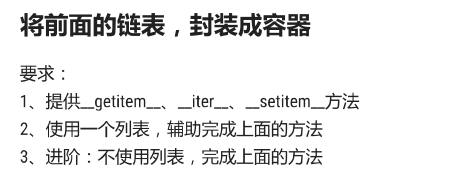

In [1]:
class SingeNode:
    def __init__(self,val,next=None,prev=None):
        self.next = next
        self.prev = prev
        self.val = val
    def __repr__(self):
        return str(self.val)

class LinkedList:
    def __init__(self):
        self.items =[] #不需要插入的列表，检索方便，但是插入的话就不合适
        self.head = None
        self.tail = None
    
    def append(self,val):
        node = SingeNode(val)
        if self.head is None:
            self.head = node
        else:
            self.tail.next = node
            node.prev = self.tail
        self.tail = node
        self.items.append(node)
    
    def insert(self,index,val):
        if index < 0:
            raise Exception('Error')
        current = None
        for i,node in enumerate(self.iternodes()):
            if i == index:
                current = node
                break
        if current is None:
            self.append(val)
            return
        
        prev = current.prev
        
        node = SingeNode(val)
        if prev is None: #开头
            self.head = node
            node.next = current
            current.prev = node
        else:
            node.prev = prev 
            node.next = current
            current.prev = node 
            prev.next = node
        self.items.insert(index, node)
        
    def pop(self):
        if self.tail is None:
            raise Exception('Empty')
        tail = self.tail
        prev = tail.prev
        #next = tail.next #None
        if prev is None:
            self.head = None 
            self.tail = None
        else:
            self.tail = prev
            prev.next = None
        self.items.pop()
        return tail.val
    
    def remove(self, index):
        if self.tail is None:
            raise Exception('Empty')
        
        if index < 0: #不接受负数
            raise IndexError('Not negative index{}'.format(index))
            
        current = None
        for i, nodex in enumerate(self.iternodes()):
            if i == index:
                current = node
                break
        else: #Not found
            raise IndexError('wrong index {}'.format(index))
        
        prev = current.prev
        next = current.next
        
        # 4种情况
        if prev is None and next is None: #only one node
            self.head = None
            self.tail = None
        elif prev is None: #头部
            self.head = next
            next.prev = None
        elif next is None: #尾部
            self.tail = prev
            self.next = None
        else:#在中间
            prev.next = next
            next.prev = prev
        
        del current
        self.items.pop(index)
    
    def iternodes(self,reverse=False):
        current = self.tail if reverse else self.head
        while current:
            yield current
            current = current.prev if reverse else current.next
   
    def getitem(self,index):
        if index < 0:
            return None
        current = None
        for i,node in enumerate(self.iternodes()):
            if i == index:
                current = node
                break
        if current is not None:
            return current 
        
    def __getitem__(self,item):
        return self.nodes(item)

        


## property装饰器

In [9]:
class Property:
    def __init__(self, fget, fset=None):
        self.fget = fget
        self.fset = fset
        pass

    def __get__(self, instance, owner):
        if instance is not None:
        #print('p.get', self, instance, owner)
            return self.fget(instance)
        return

    def __set__(self, instance, value):
        if callable(self.fset):
        # print('p.set', instance, value)
            return self.fset(instance, value)
        else:
            raise AttributeError('cant set attribute')

    def setter(self, fn):
        self.fset = fn
        return self
class A:
    def __init__(self, data):
        self._data = data

    @Property #data = Propery(data) => data= obj
    def data(self):
        return self._data

    @data.setter
    def data(self, value): #data = data.setter(data) => data= obj
        self._data = value


In [10]:
a = A(2)
print(a.data)
a.data = 200
print(a.data)

2
200


In [11]:
print(a.__dict__)

{'_data': 200}


In [12]:
print(A.__dict__)

{'__module__': '__main__', '__init__': <function A.__init__ at 0x0000000006133950>, 'data': <__main__.Property object at 0x00000000064244E0>, '__dict__': <attribute '__dict__' of 'A' objects>, '__weakref__': <attribute '__weakref__' of 'A' objects>, '__doc__': None}


##  运算符重载中的反向方法

In [17]:
 class Add:
    def __init__(self, x):
        self.x = x

    def __add__(self, other):
        print('add', self)
        return self.x + other.x
    
    def __iadd__(self, other):
        print('iadd', self)
        return self.x + other.x
    
    def __radd__(self, other):
        print('radd', self)
class B:
    def __init__(self, x):
        self.x = x

In [14]:
a = Add(4)
b = Add(6)
print(a + b)
a += b

add <__main__.Add object at 0x000000000623C940>
10
iadd <__main__.Add object at 0x000000000623C940>


In [9]:
b + 1

add <__main__.Add object at 0x0000000006215828>


AttributeError: 'int' object has no attribute 'x'

In [10]:
1 + b

radd <__main__.Add object at 0x0000000006215828>


In [18]:
a1 = Add(4)
b1 = B(5)
a1 + b1

add <__main__.Add object at 0x000000000623C1D0>


9

In [19]:
b1 + a1

radd <__main__.Add object at 0x000000000623C1D0>


### eg2

In [1]:
 class A:
    def __init__(self, x):
        self.x = x

    def __add__(self, other):
        print('add', self)
        return self.x + other.x
    
    def __iadd__(self, other):
        print('iadd', self)
        return self.x + other.x
    
    def __radd__(self, other):
        print('radd', self)
        return self + other #顺序不能乱
class B:
    def __init__(self, x):
        self.x = x

In [2]:
a = A(15)
b = B(5)

In [4]:
b + a

radd <__main__.A object at 0x0000000005A06A90>
add <__main__.A object at 0x0000000005A06A90>


20

In [3]:
1 + a

radd <__main__.A object at 0x0000000005E06B00>
add <__main__.A object at 0x0000000005E06B00>


AttributeError: 'int' object has no attribute 'x'

In [4]:
a + 1

add <__main__.A object at 0x0000000005E06B00>


AttributeError: 'int' object has no attribute 'x'

In [16]:
 class A:
    def __init__(self, x):
        self.x = x

    def __add__(self, other):
        print('add', self)
        try:
            res = self.x + other.x
        except:
            try:
                o = int(other)
            except:
                o = 0
            res = self.x + o
        return res
    
    def __iadd__(self, other):
        print('iadd', self)
        return self.x + other.x
    
    def __radd__(self, other):
        print('radd', self)
        return self + other #顺序不能乱
class B:
    def __init__(self, x):
        self.x = x

In [17]:
a = A(15)
b = B(5)

In [18]:
a + b

add <__main__.A object at 0x00000000061FA780>


20

In [19]:
1 + a

radd <__main__.A object at 0x00000000061FA780>
add <__main__.A object at 0x00000000061FA780>


16

In [21]:
isinstance(a,A)

True

### 第二种思路

In [22]:
 class A:
    def __init__(self, x):
        self.x = x

    def __add__(self, other):
        print('add', self)
        if hasattr(other,'x'):
            res = self.x + other.x
        else:
            try:
                o = int(other)
            except:
                o = 0
            res = self.x + o
        return res
    
    def __iadd__(self, other):
        print('iadd', self)
        return self.x + other.x
    
    def __radd__(self, other):
        print('radd', self)
        return self + other #顺序不能乱
class B:
    def __init__(self, x):
        self.x = x

In [23]:
a = A(15)
b = B(5)

In [24]:
a + b

add <__main__.A object at 0x00000000064B9390>


20

In [25]:
1 + a

radd <__main__.A object at 0x00000000064B9390>
add <__main__.A object at 0x00000000064B9390>


16